# Экспериментальная проверка закона Мозли

https://www.youtube.com/watch?v=8pvZfUrSRRo




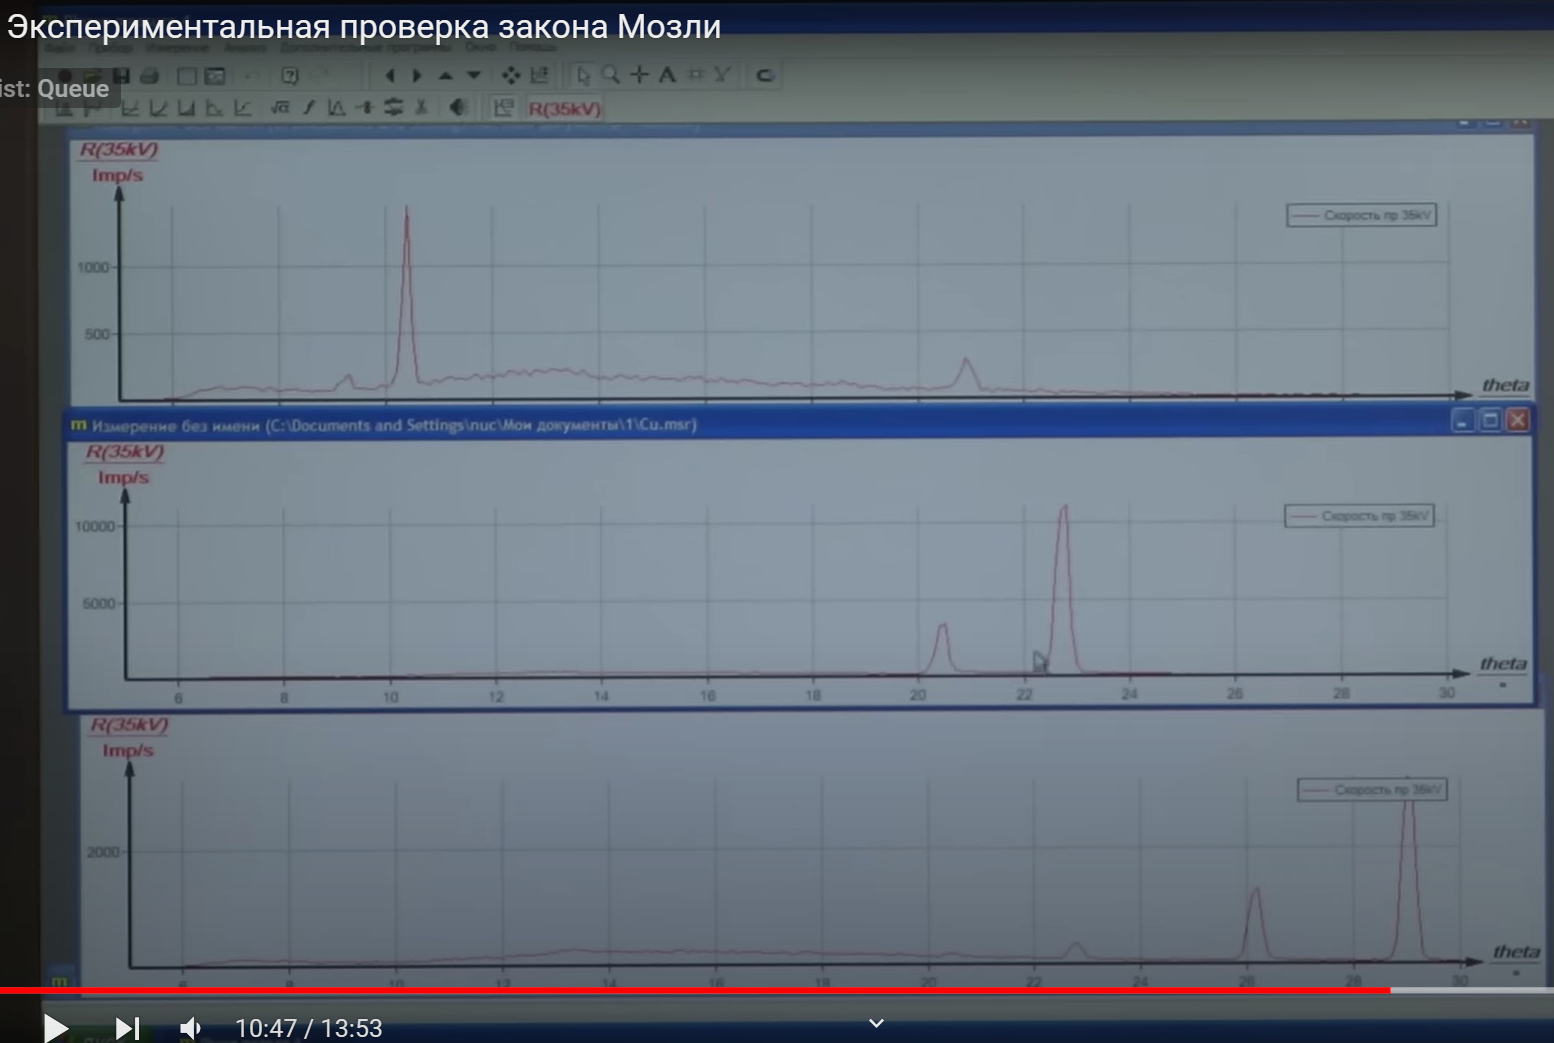

Bohr's model
$$
E_{n_1, n_2} = E_0 \left( \frac{1}{n_1^2} - \frac{1}{n_2^2}\right)
$$

Moseley law
$$
E_n = - \frac{(Z - \sigma_n)^2}{n^2} R_y
$$

Bragg's diffraction
$$
\lambda = 2 d \sin \theta / m
$$


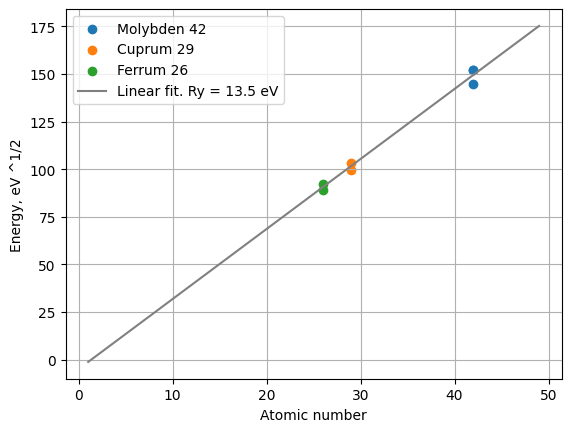

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, h
from scipy.stats import linregress

data = '''
# Molybden
42 10.3 2  1
42 9.6 3  1
42 21.0 2  2
# Cuprum
29 22.7 2  1
29 20.5 3  1
# Ferrum
26 29.0 2  1
26 26.0 3  1
'''

Z, theta, n, m = np.genfromtxt(data.splitlines(), unpack=True)
d = 2e-10 # atomic planes distance, m
sigma = 1
wavelength = 2 * d * np.sin(theta * np.pi / 180) / m
delta_energy = h * c / wavelength
coeff = 1  - 1 / n / n
E0 = delta_energy / coeff
E0_ev = E0 * 6.242e18 # grom Joule to eV

fit = linregress(Z, np.sqrt(E0_ev))
Ry = fit.slope **2
note = f'Linear fit. Ry = {Ry:.1f} eV'

plt.scatter(Z[Z==42], np.sqrt(E0_ev[Z==42]) , label='Molybden 42')
plt.scatter(Z[Z==29], np.sqrt(E0_ev[Z==29]) , label='Cuprum 29')
plt.scatter(Z[Z==26], np.sqrt(E0_ev[Z==26]) , label='Ferrum 26')

zdense = range(1, 50)
plt.plot(zdense, fit.intercept + fit.slope * zdense, label=note, color='gray')
plt.grid()
plt.legend()
plt.xlabel('Atomic number')
plt.ylabel('Energy, eV ^1/2')
plt.show()



In [74]:
fit.intercept

-4.855776923371096